<a href="https://colab.research.google.com/github/af001/Predictive-Analytics/blob/master/MSDS422/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


[+] Analysis of initial survey data

[+] Number of Respondents = 207
Index([u'Personal_JavaScalaSpark', u'Personal_JavaScriptHTMLCSS',
       u'Personal_Python', u'Personal_R', u'Personal_SAS',
       u'Professional_JavaScalaSpark', u'Professional_JavaScriptHTMLCSS',
       u'Professional_Python', u'Professional_R', u'Professional_SAS',
       u'Industry_JavaScalaSpark', u'Industry_JavaScriptHTMLCSS',
       u'Industry_Python', u'Industry_R', u'Industry_SAS',
       u'Python_Course_Interest', u'Foundations_DE_Course_Interest',
       u'Analytics_App_Course_Interest', u'Systems_Analysis_Course_Interest',
       u'Courses_Completed', u'PREDICT400', u'PREDICT401', u'PREDICT410',
       u'PREDICT411', u'PREDICT413', u'PREDICT420', u'PREDICT422',
       u'PREDICT450', u'PREDICT451', u'PREDICT452', u'PREDICT453',
       u'PREDICT454', u'PREDICT455', u'PREDICT456', u'PREDICT457',
       u'OtherPython', u'OtherR', u'OtherSAS', u'Other', u'Graduate_Date'],
      dtype='object')
              P

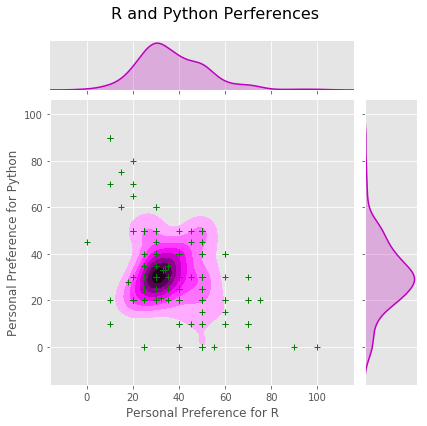

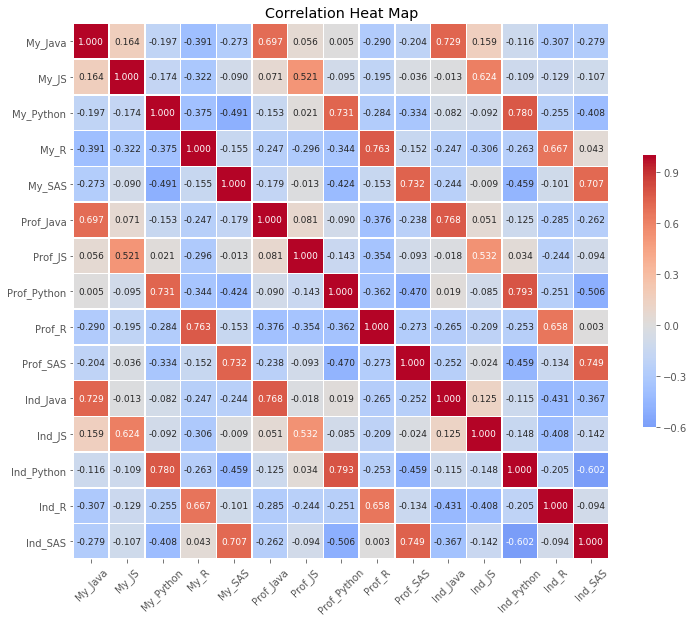

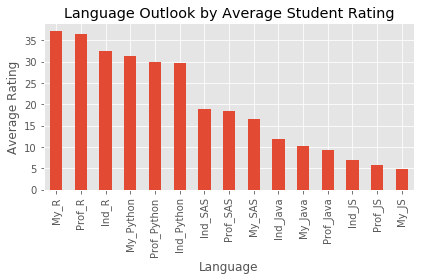

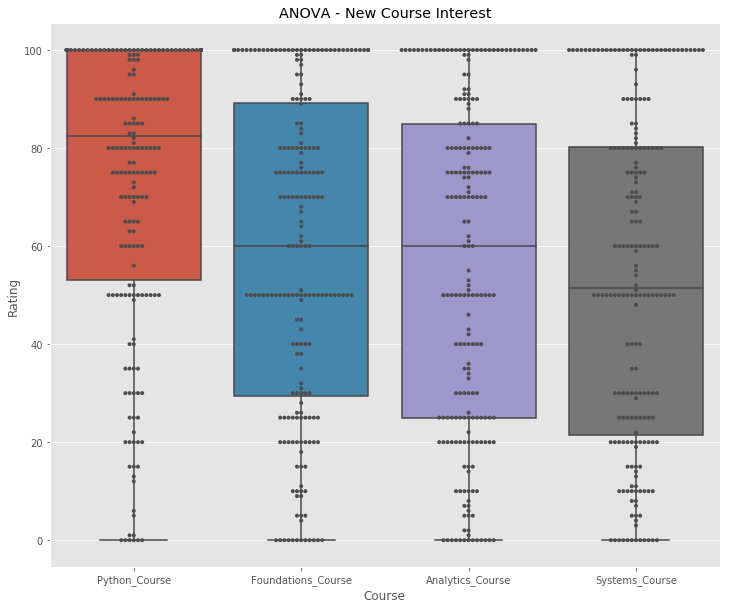

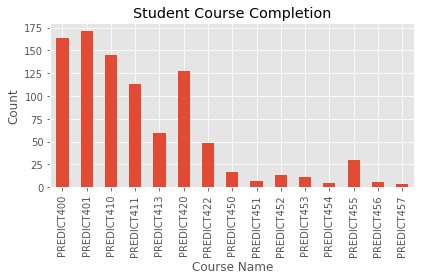

<Figure size 432x288 with 0 Axes>

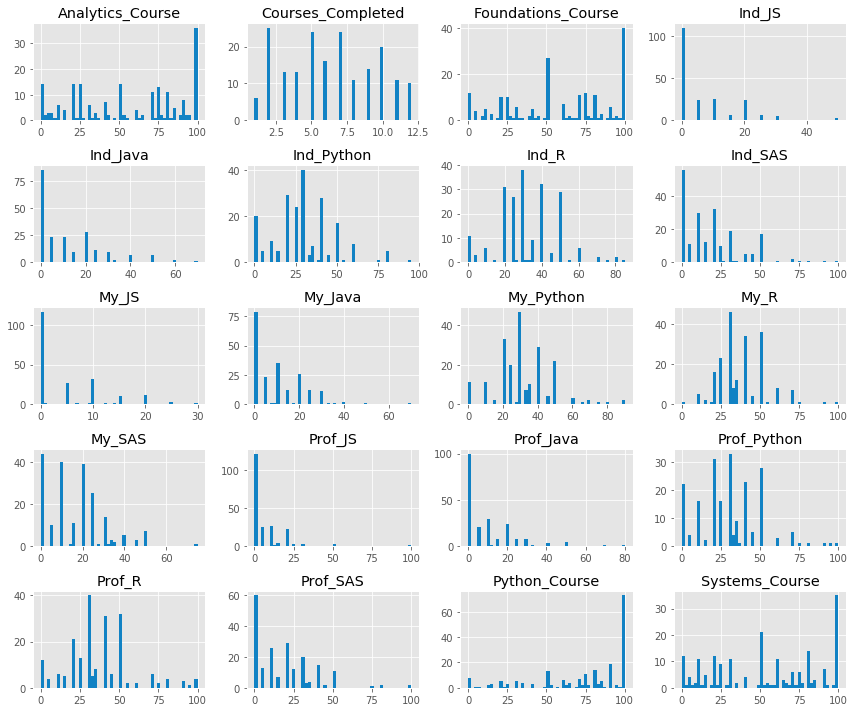

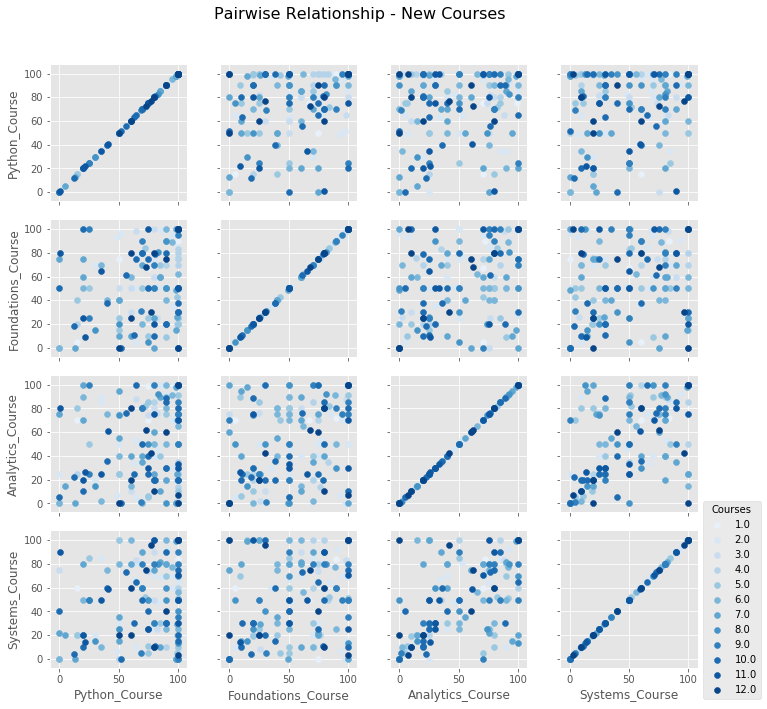

<Figure size 432x288 with 0 Axes>

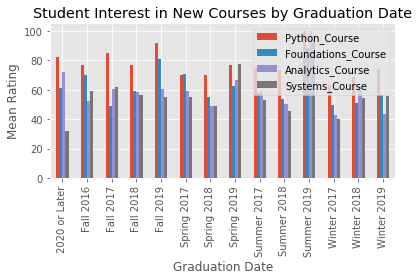

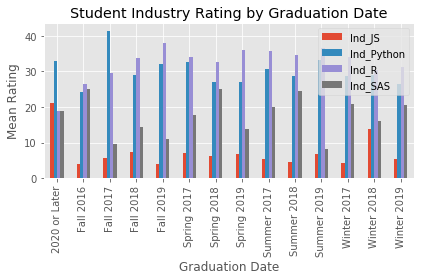


[+] DONE!!!


In [3]:
import pandas as pd  
import numpy as np  
import seaborn as sns  
import matplotlib.pyplot as plt  
plt.style.use('ggplot')

# correlation function to generate heatmaps. Show entire square correlation
# table as opposed to half (just a triangle).
def corr_chart(df_corr):
    corr=df_corr.corr()
    plt.figure(num=2, figsize=(12, 10))
    sns.heatmap(corr, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')         
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')  
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

# read the survey data from a csv into a pandas dataframe
valid_survey_input = pd.read_csv('mspa-survey-data.csv')

# set the RespondentID as the dataframe index
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)

# start analysis portion of data being sent to stdout
print '\n[+] Analysis of initial survey data'
print '\n[+] Number of Respondents =', len(valid_survey_input) 

# show the column/variable names of the DataFrame
# note that RespondentID is no longer present
print(valid_survey_input.columns)

# abbreviated printing of the first five rows of the data frame
print(pd.DataFrame.head(valid_survey_input)) 

# shorten the variable/column names for software preference variables
survey_df = valid_survey_input.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS',
    'Python_Course_Interest': 'Python_Course',
    'Foundations_DE_Course_Interest': 'Foundations_Course',
    'Analytics_App_Course_Interest': 'Analytics_Course',
    'Systems_Analysis_Course_Interest': 'Systems_Course'})
    
# define subset DataFrame for analysis of software preferences 
software_df = survey_df.loc[:, 'My_Java':'Ind_SAS']
                     
# scatter plot to examime preference of language (R vs Python). Switch to seaborn
# to view the density graph and individual plots
g = sns.jointplot(x='My_R', y='My_Python', data=survey_df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="g", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("Personal Preference for R", "Personal Preference for Python");
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('R and Python Perferences', fontsize=16)
g.savefig('plot-scatter-r-python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=False, pad_inches=0.25, frameon=None)  

# examine intercorrelations among software preference variables
# with correlation matrix/heat map
corr_chart(df_corr = software_df) 

# descriptive statistics for software preference variables
print '\n[+] Descriptive statistics for survey data'
print software_df.describe()

# descriptive statistics for one variable, no major visualizations here
print '\n[+] Descriptive statistics for courses completed' 
print survey_df['Courses_Completed'].describe()

# descriptive statistics for course interests - python
print '\n[+] Descriptive statistics for interests in new Python courses'
print survey_df['Python_Course'].describe()

# descriptive statistics for course interests - foundations
print '\n[+] Descriptive statistics for interests in new DE Foundations courses'
print survey_df['Foundations_Course'].describe()

# descriptive statistics for course interests - analytics app dev
print '\n[+] Descriptive statistics for interests in new Analytic App Dev courses'
print survey_df['Analytics_Course'].describe()

# descriptive statistics for course interests - analytics app
print '\n[+] Descriptive statistics for interests in new Systems Analysis courses'
print survey_df['Systems_Course'].describe()

# sort the values to get a better visual of the most/least popular
# languages. Assess based on language average score
software_means = software_df.mean(axis=0, skipna=True)
software_means.sort_values(inplace=True, ascending=False)

# show a histrogram for each numerical attribute to look for patterns
plt.figure(9)
survey_df.hist(bins=50, figsize=(12,10), color='#1182c4')
plt.tight_layout()
plt.savefig('lsurvey-histogram.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=False, pad_inches=0.25, frameon=None)  

# create a plot depicting the average of each language (sorted) rating for side by 
# side analysis to determine popularity and relationships
plt.figure(3)
plt.xlabel('Language')
plt.ylabel('Average Rating')
plt.title('Language Outlook by Average Student Rating')
software_means.plot.bar()
plt.tight_layout()
plt.savefig('language-comparison-average.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=False, pad_inches=0.25, frameon=None)  

# alternative to heatmap, use seaborn to display pairwise relationships of
# potential future courses
interest_df = survey_df.loc[:, 'Python_Course':'Systems_Course']
interest_df['Courses_Completed'] = survey_df.loc[:, 'Courses_Completed']
h = sns.PairGrid(interest_df, hue='Courses_Completed', vars=['Python_Course', 
    'Foundations_Course', 'Analytics_Course', 'Systems_Course'], palette='Blues')
h.map(plt.scatter)
h.fig.subplots_adjust(top=0.9)
h.fig.suptitle('Pairwise Relationship - New Courses', fontsize=16)
plt.legend(loc='center left',bbox_to_anchor=(1,0.5), title="Courses")
h.savefig('pairwise-relationship-new.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=False, pad_inches=0.25, frameon=None)  

# drop completed_courses before doing additional variance analayis 
interest_df.drop('Courses_Completed', axis=1, inplace=True)

# depict a boxplot and swarmplot to show ANOVA for potential future courses
# determine shape of distribution, outliers, and analysis of variance
plt.figure(5, figsize=(12, 10))   
plt.title('ANOVA - New Course Interest')  
plt.xlabel('Course')
plt.ylabel('Rating')        
sns.boxplot(data=interest_df)
sns.swarmplot(data=interest_df,
              size=4, color=".3", linewidth=0)  
plt.savefig('anova-new-course.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=False, pad_inches=0.25, frameon=None)  

# create a dataframe on courses attended. Due to the inconsistencies of 'other'
# courses, only analyze the PREDICT series courses. Show frequency chart of 
# courses attended to gain an understanding of potential influencers to student
# responses            
courses_df = survey_df.loc[:, 'PREDICT400':'PREDICT457']
course_breakdown = courses_df.count()
print '\n[+] Frequency of Courses Attended: \n%s' % course_breakdown

plt.figure(6)
plt.xlabel('Course Name')
plt.ylabel('Count')
plt.title('Student Course Completion')
course_breakdown.plot.bar()
plt.tight_layout()
plt.savefig('course-completion.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=False, pad_inches=0.25, frameon=None)  

# Use the interests dataframe to determine if the graduation date of students
# influences their response for interest in new courses. Do newer students 
# tend to promote one language over another compared to olderer students
interest_df['Graduate_Date'] = survey_df.loc[:,'Graduate_Date']
plt.figure(87)
interest_df.groupby('Graduate_Date').mean().plot.bar()
plt.xlabel('Graduation Date')
plt.ylabel('Mean Rating')
plt.title('Student Interest in New Courses by Graduation Date')
plt.tight_layout()
plt.savefig('interest-by-term.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=False, pad_inches=0.25, frameon=None)

# print the descriptive statistics of the aforementioned visualization
print '\n[+] Interest in New Courses by Graduation Date'
print interest_df.groupby('Graduate_Date').describe()

# create a new dataframe to look at what language students think is important
# in the industry. Analyze by graduation date to see if the trend is shifting
software_industry_df = survey_df.loc[:,'Ind_JS':'Ind_SAS']
software_industry_df['Graduate_Date'] = survey_df.loc[:,'Graduate_Date']

# plot the aforementioned dataframe for analysis
plt.figure(88)
software_industry_df.groupby('Graduate_Date').mean().plot.bar()
plt.xlabel('Graduation Date')
plt.ylabel('Mean Rating')
plt.title('Student Industry Rating by Graduation Date')
plt.tight_layout()
plt.savefig('industry-by-term.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=False, pad_inches=0.25, frameon=None)

# print descriptive statistics on the aforementioned dataframe
print '\n[+] Student Industry Rating by Graduation Date'
print software_industry_df.groupby('Graduate_Date').describe()

# show all the plots!!
plt.show()

print '\n[+] DONE!!!'